### Deliverable 3: make three attempts at optimizing the model

In [1]:
# 2. Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/Users/iralee/Module_19/Neural_Network_Charity_Analysis/Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
#3. Preprocess the dataset like you did in Deliverable 1, taking into account any modifications to optimize the model
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# 4. Design a neural network model, taking into account any modifications that will optimize the model to achieve higher than 75% accuracy

# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type= application_df.value_counts(['APPLICATION_TYPE'])
app_type

APPLICATION_TYPE
T3                  27037
T4                   1542
T6                   1216
T5                   1173
T19                  1065
T8                    737
T7                    725
T10                   528
T9                    156
T13                    66
T12                    27
T2                     16
T14                     3
T25                     3
T29                     2
T15                     2
T17                     1
dtype: int64

<AxesSubplot:ylabel='Density'>

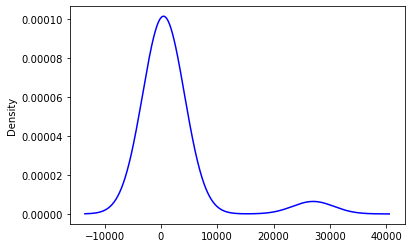

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type.plot.density(color='blue')

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type[app_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_type= application_df.value_counts(['CLASSIFICATION'])
class_type

CLASSIFICATION
C1000             17326
C2000              6074
C1200              4837
C3000              1918
C2100              1883
                  ...  
C2190                 1
C2380                 1
C2500                 1
C2561                 1
C8210                 1
Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

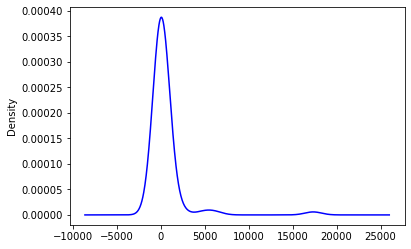

In [8]:
# Visualize the value counts of CLASSIFICATION
class_type.plot.density(color='blue')

In [9]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(class_type[class_type < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/iralee/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/Users/iralee/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/iralee/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3600      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


2022-02-10 01:37:25.206526: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-10 01:37:25.207039: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=10)

Train on 25724 samples
Epoch 1/10
25724/25724 [==============================] - 2s 90us/sample - loss: 90089.5705 - accuracy: 0.4976
Epoch 2/10
25724/25724 [==============================] - 2s 64us/sample - loss: 79887.1917 - accuracy: 0.5028
Epoch 3/10
25724/25724 [==============================] - 2s 64us/sample - loss: 62193.2192 - accuracy: 0.5155
Epoch 4/10
25724/25724 [==============================] - 2s 64us/sample - loss: 57202.8540 - accuracy: 0.5151
Epoch 5/10
25724/25724 [==============================] - 2s 64us/sample - loss: 15242.1043 - accuracy: 0.5019
Epoch 6/10
25724/25724 [==============================] - 2s 64us/sample - loss: 29699.8865 - accuracy: 0.5051
Epoch 7/10
25724/25724 [==============================] - 2s 64us/sample - loss: 33015.6985 - accuracy: 0.5240s - loss: 35609.4101 - accuracy: 
Epoch 8/10
25724/25724 [==============================] - 2s 64us/sample - loss: 23975.8180 - accuracy: 0.4968
Epoch 9/10
25724/25724 [==============================] 

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 1.0315 - accuracy: 0.6960
Loss: 1.1424075072360804, Accuracy: 0.6959766745567322


### attempt 2

In [19]:
## add one more layer

In [20]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               4500      
_________________________________________________________________
dense_4 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 15,041
Trainable params: 15,041
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=10)

Train on 25724 samples
Epoch 1/10
25724/25724 [==============================] - 3s 116us/sample - loss: 43668.9617 - accuracy: 0.4981
Epoch 2/10
25724/25724 [==============================] - 2s 95us/sample - loss: 7125.9862 - accuracy: 0.4992
Epoch 3/10
25724/25724 [==============================] - 2s 94us/sample - loss: 747.2260 - accuracy: 0.5268
Epoch 4/10
25724/25724 [==============================] - 2s 94us/sample - loss: 0.6936 - accuracy: 0.5321
Epoch 5/10
25724/25724 [==============================] - 2s 94us/sample - loss: 0.6912 - accuracy: 0.5321
Epoch 6/10
25724/25724 [==============================] - 2s 94us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 7/10
25724/25724 [==============================] - 3s 97us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 8/10
25724/25724 [==============================] - 3s 99us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 9/10
25724/25724 [==============================] - 3s 99us/sample - loss: 0.6911 - accuracy: 0.5321
Epoc

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.6930 - accuracy: 0.5706
Loss: 0.6819986276515371, Accuracy: 0.5706122517585754


## attempt 3

In [ ]:
## add 2 more layers
## activation sigmoid

In [24]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))


# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=15)

Train on 25724 samples
Epoch 1/15
25724/25724 [==============================] - 3s 117us/sample - loss: 0.6912 - accuracy: 0.5321
Epoch 2/15
25724/25724 [==============================] - 3s 98us/sample - loss: 0.6912 - accuracy: 0.5321
Epoch 3/15
25724/25724 [==============================] - 2s 96us/sample - loss: 0.6912 - accuracy: 0.5321
Epoch 4/15
25724/25724 [==============================] - 2s 96us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 5/15
25724/25724 [==============================] - 3s 100us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 6/15
25724/25724 [==============================] - 3s 100us/sample - loss: 0.6912 - accuracy: 0.5321
Epoch 7/15
25724/25724 [==============================] - 3s 102us/sample - loss: 0.6912 - accuracy: 0.5321
Epoch 8/15
25724/25724 [==============================] - 3s 99us/sample - loss: 0.6911 - accuracy: 0.5321
Epoch 9/15
25724/25724 [==============================] - 3s 99us/sample - loss: 0.6912 - accuracy: 0.5321
Epoch 10/1

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.6970 - accuracy: 0.5860
Loss: 0.6783134100944586, Accuracy: 0.5860058069229126
